In [1]:
# Import Dataset from Repository
import pandas as pd

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_df = pd.read_csv(url, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Display the first few rows of the dataset
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [2]:
# Statistical summary
summary = iris_df.describe()
print(summary)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


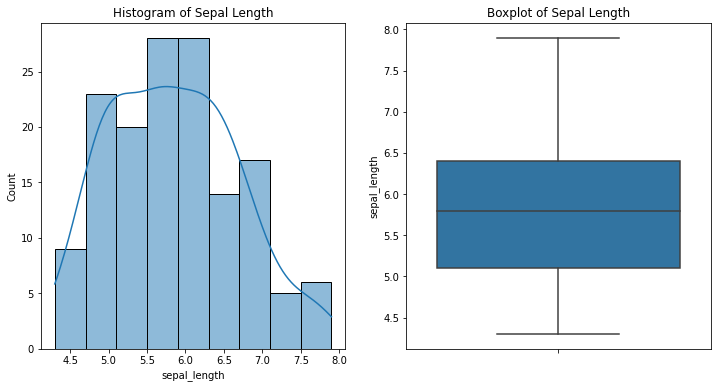

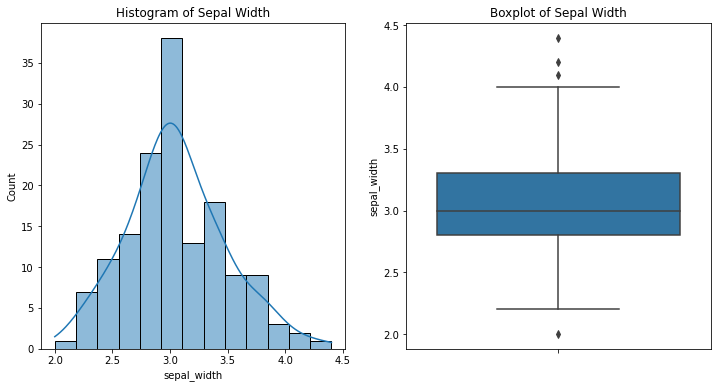

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms and box plots for sepal length and sepal width
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(iris_df['sepal_length'], kde=True)
plt.title('Histogram of Sepal Length')

plt.subplot(1, 2, 2)
sns.boxplot(y='sepal_length', data=iris_df)
plt.title('Boxplot of Sepal Length')

plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(iris_df['sepal_width'], kde=True)
plt.title('Histogram of Sepal Width')

plt.subplot(1, 2, 2)
sns.boxplot(y='sepal_width', data=iris_df)
plt.title('Boxplot of Sepal Width')

plt.show()

In [4]:
# Goodness -of -Fit test
import numpy as np
from scipy.stats import norm, kstest

# Step 1: Generate a sample from a normal distribution
np.random.seed(42)
sample_size = 100
mean = 0
std_dev = 1
sample = np.random.normal(mean, std_dev, sample_size)

# Step 2: Compute the Empirical Distribution Function (EDF)
def empirical_distribution_function(x, data):
	return np.sum(data <= x) / len(data)
edf_values = [empirical_distribution_function(x, sample) for x in sample]

# Step 3: Define the Reference Distribution
reference_cdf = norm.cdf(sample)

# Step 4: Calculate the Kolmogorov–Smirnov Statistic
ks_statistic, ks_p_value = kstest(sample, 'norm')

# Step 5: Comparing
alpha = 0.05
critical_value = 1.36 # This value can be obtained from the Kolmogorov-Smirnov table for a specific significance level

print(f"Kolmogorov-Smirnov Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")

if ks_statistic > critical_value or ks_p_value < alpha:
	print("Reject the null hypothesis. The sample does not come from the specified distribution.")
else:
	print("Fail to reject the null hypothesis. The sample comes from the specified distribution.")


Kolmogorov-Smirnov Statistic: 0.10357070563896065
P-value: 0.21805553378516207
Fail to reject the null hypothesis. The sample comes from the specified distribution.


In [5]:
#Hypothesis Testing
from scipy.stats import ttest_ind

# Selecting two groups based on the species
group1 = iris_df[iris_df['species'] == 'Iris-setosa']['sepal_length']
group2 = iris_df[iris_df['species'] == 'Iris-versicolor']['sepal_length']

# Performing t-test
t_stat, p_value = ttest_ind(group1, group2)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -10.52098626754911
p-value: 8.985235037487077e-18


Documentation of Findings
1.Statistical summaries provide insights into the central tendency and dispersion of the variables.
2.3.Visual inspection suggests that sepal length and sepal width approximately follow normal distributions.
The goodness-of-fit test can formally validate if these variables follow normal distributions.
The t-test helps determine if there's a significant difference in sepal length across different species.